# Lance Stroll
<img src="https://www.formula1.com/content/fom-website/en/drivers/lance-stroll/_jcr_content/image.img.1920.medium.jpg/1641828817373.jpg" width="300">

### Team: Aston Martin

<img src ="https://www.formula1.com/content/fom-website/en/drivers/lance-stroll/_jcr_content/helmet.img.png/1646824889978.png" width="200">


In [1]:
library (tidyverse)
library (tidymodels)
source("source/master_functions.r")
source("source/regression.r")
source("source/prediction.r")
set.seed(620)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [2]:
initialize_master()

Parsed with column specification:
cols(
  circuitId = col_double(),
  circuitRef = col_character(),
  name = col_character(),
  location = col_character(),
  country = col_character(),
  lat = col_double(),
  lng = col_double(),
  alt = col_character(),
  url = col_character()
)

Parsed with column specification:
cols(
  constructorStandingsId = col_double(),
  raceId = col_double(),
  constructorId = col_double(),
  points = col_double(),
  position = col_double(),
  positionText = col_character(),
  wins = col_double()
)

Parsed with column specification:
cols(
  constructorResultsId = col_double(),
  raceId = col_double(),
  constructorId = col_double(),
  points = col_double(),
  status = col_character()
)

Parsed with column specification:
cols(
  constructorId = col_double(),
  constructorRef = col_character(),
  name = col_character(),
  nationality = col_character(),
  url = col_character()
)

Parsed with column specification:
cols(
  driverId = col_double(),
  driverRef = col_

In [3]:
# Filtering Lap Data For 2022 Drivers

lap_data <- lap_times %>%
            filter(driverId %in% driver_ids) %>%
            filter(raceId %in% race_ids)

str_laps <- lap_data %>%
            filter(driverId == 840)

# Season Analysis

In [4]:
rmse_col <- data.frame(.metric = character(), .estimator = character(), .estimate = double(), Round = double(), stringsAsFactors=FALSE) 

racetime_col <- data.frame(race_time_milliseconds = double(), race_time_mins = double(), race_time_hrs = double()) 

rmse_col

racetime_col

.metric,.estimator,.estimate,Round
<chr>,<chr>,<dbl>,<dbl>


race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>


`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
990,56
1011,56
1052,56
971,12
1045,2


`geom_smooth()` using formula 'y ~ x'



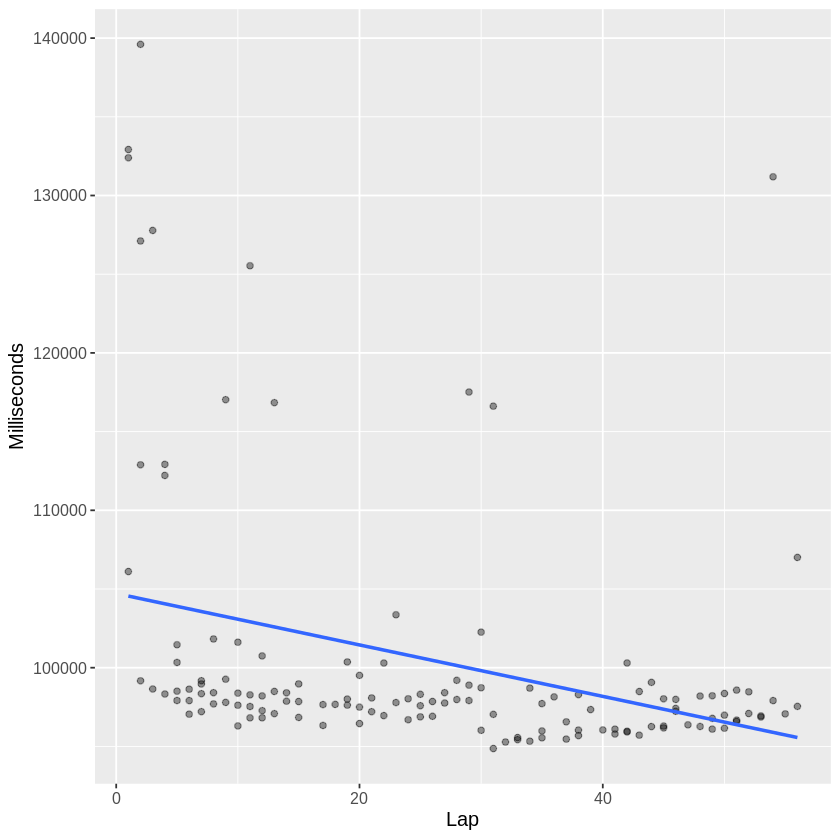

In [5]:
set.seed(2022)

#1. BAHRAIN 

ls_bahrain <- str_laps %>%
                filter(raceId %in% bahrain_race_ID) 

ls_bahrain_clean <- ls_bahrain %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))
ls_bahrain_clean
ls_bahrain_clean_ID <- ls_bahrain_clean %>%
                        pull(raceId)


### SPLITTING DATA

ls_bahrain_races <- str_laps %>%
                    filter(raceId %in% ls_bahrain_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(3:1000)

formulaone_split <- initial_split(ls_bahrain_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 1

initiate_rmse() 

### GETS PREDICTION

get_bahrain_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1054,65
1042,51


`geom_smooth()` using formula 'y ~ x'



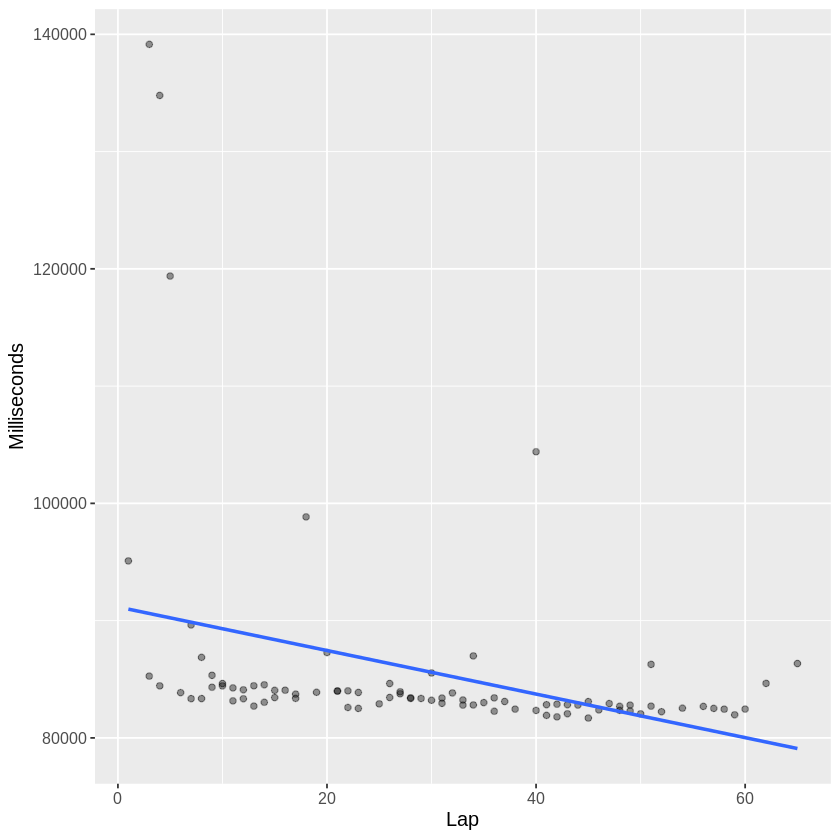

In [6]:
set.seed(2022)

#2. Portimão

ls_Portimão <- str_laps %>%
                filter(raceId %in% Portimão_race_ID) 

ls_Portimão_clean <- ls_Portimão %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ls_Portimão_clean
ls_Portimão_clean_ID <- ls_Portimão_clean %>%
                        pull(raceId)


### SPLITTING DATA

ls_Portimão_races <- str_laps %>%
                    filter(raceId %in% ls_Portimão_clean_ID) 

formulaone_split <- initial_split(ls_Portimão_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 2

initiate_rmse() 

### GETS PREDICTION

get_Portimão_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
989,58
1010,57
969,40


`geom_smooth()` using formula 'y ~ x'



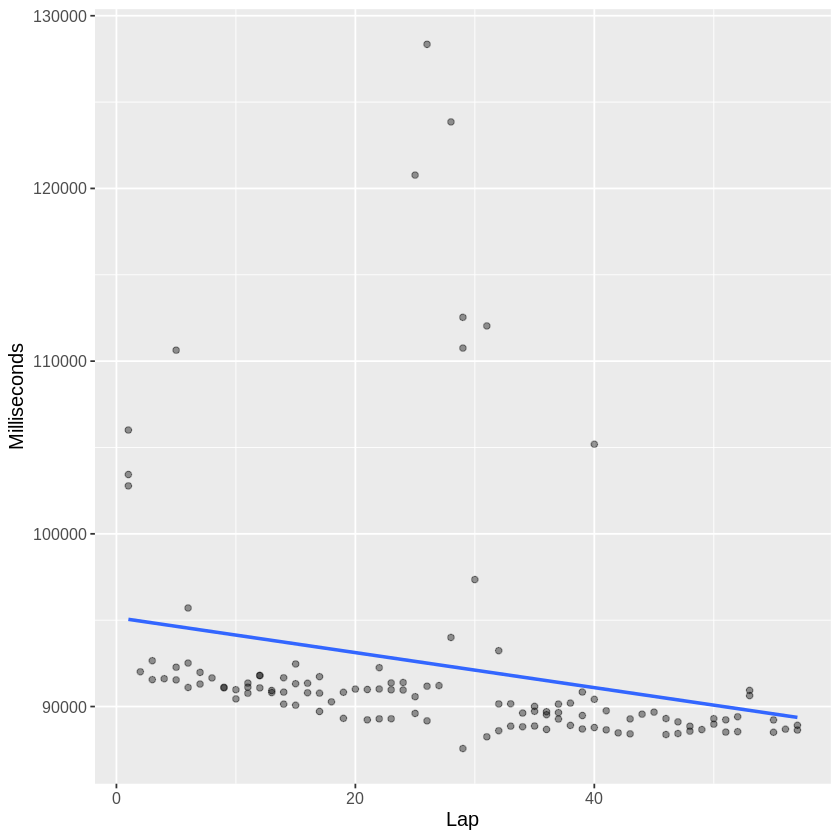

In [7]:
set.seed(2022)

#3. Australia

ls_aus <- str_laps %>%
                filter(raceId %in% aus_race_ID) 

ls_aus_clean <- ls_aus %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ls_aus_clean
ls_aus_clean_ID <- ls_aus_clean %>%
                        pull(raceId)


### SPLITTING DATA

ls_aus_races <- str_laps %>%
                    filter(raceId %in% ls_aus_clean_ID)

formulaone_split <- initial_split(ls_aus_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 3

initiate_rmse() 

### GETS PREDICTION

get_australia_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1043,63
1053,63


`geom_smooth()` using formula 'y ~ x'



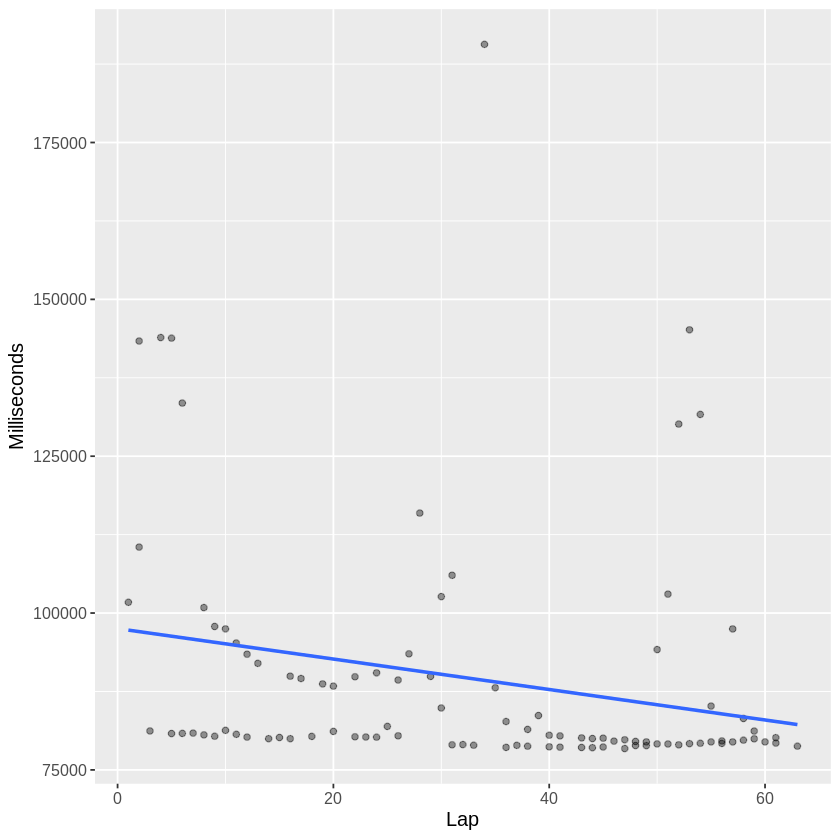

In [8]:
set.seed(2022)

#4. Italy, Imola

ls_imola <- str_laps %>%
                filter(raceId %in% imola_race_ID) 

ls_imola_clean <- ls_imola %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ls_imola_clean
ls_imola_clean_ID <- ls_imola_clean %>%
                        pull(raceId)


### SPLITTING DATA

ls_imola_races <- str_laps %>%
                    filter(raceId %in% ls_imola_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(ls_imola_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 4

initiate_rmse() 

### GETS PREDICTION

get_imola_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1044,58
1067,58


`geom_smooth()` using formula 'y ~ x'



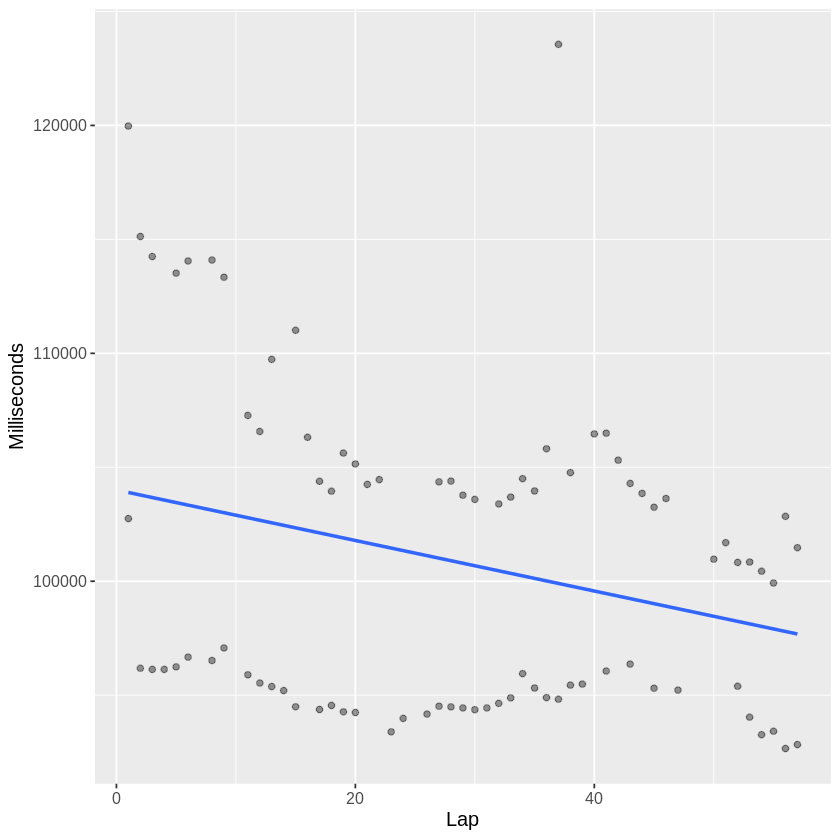

In [9]:
set.seed(2022)

#5. Turkey (Replacing Miami)

ls_turkey <- str_laps %>%
                filter(raceId %in% turkey_race_ID) 

ls_turkey_clean <- ls_turkey %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ls_turkey_clean
ls_turkey_clean_ID <- ls_turkey_clean %>%
                        pull(raceId)


### SPLITTING DATA

ls_turkey_races <- str_laps %>%
                    filter(raceId %in% ls_turkey_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(ls_turkey_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 5

initiate_rmse() 

### GETS PREDICTION

get_miami_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1036,65
1055,65
973,64
993,64
1014,44


`geom_smooth()` using formula 'y ~ x'



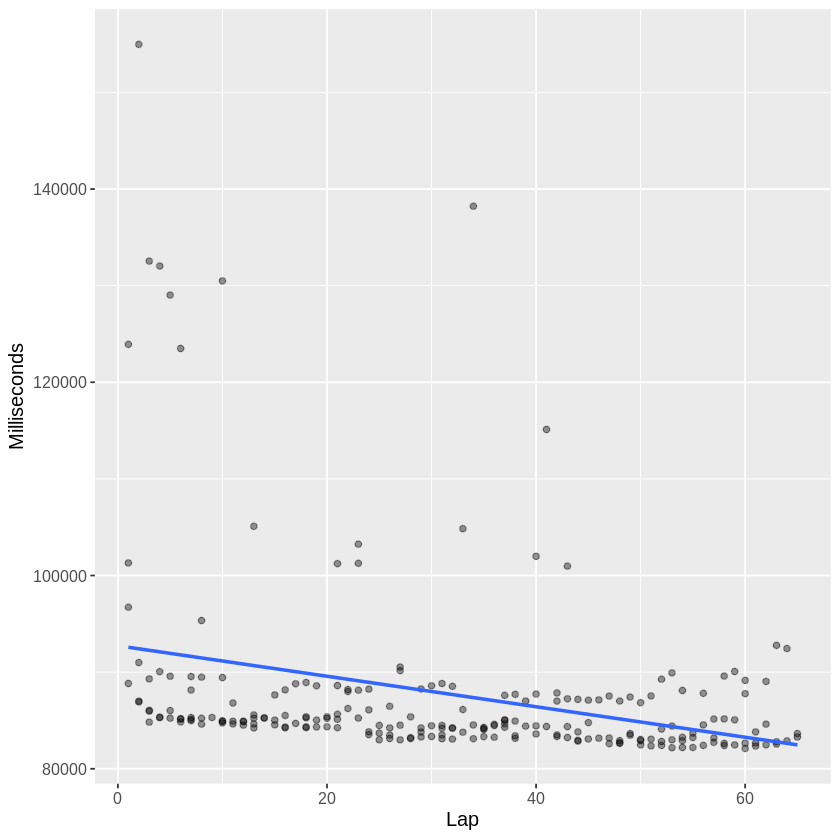

In [10]:
set.seed(2022)

#6. Spain

ls_spain <- str_laps %>%
                filter(raceId %in% spain_race_ID) 

ls_spain_clean <- ls_spain %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ls_spain_clean
ls_spain_clean_ID <- ls_spain_clean %>%
                        pull(raceId)


### SPLITTING DATA

ls_spain_races <- str_laps %>%
                    filter(raceId %in% ls_spain_clean_ID)

formulaone_split <- initial_split(ls_spain_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 6

initiate_rmse() 

### GETS PREDICTION

get_spain_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1015,77
1056,77
994,76
974,71


`geom_smooth()` using formula 'y ~ x'



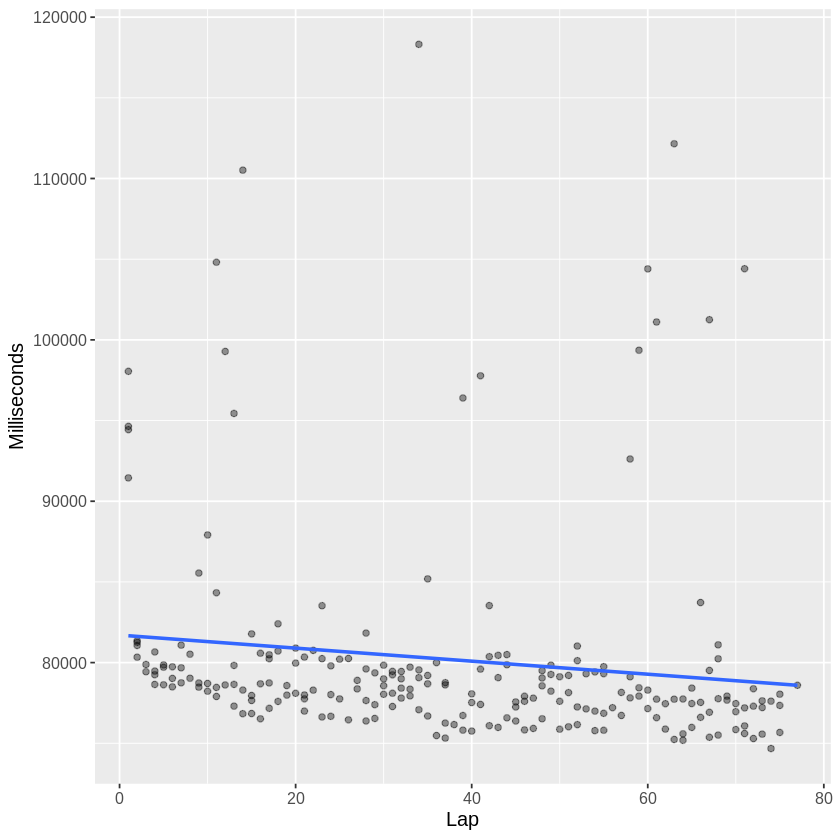

In [11]:
set.seed(2022)

#7. Monaco

ls_monaco <- str_laps %>%
                filter(raceId %in% monaco_race_ID) 

ls_monaco_clean <- ls_monaco %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ls_monaco_clean
ls_monaco_clean_ID <- ls_monaco_clean %>%
                        pull(raceId)


### SPLITTING DATA

ls_monaco_races <- str_laps %>%
                    filter(raceId %in% ls_monaco_clean_ID)

formulaone_split <- initial_split(ls_monaco_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 7

initiate_rmse() 

### GETS PREDICTION

get_monaco_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
976,51
992,51
1013,51
1057,29


`geom_smooth()` using formula 'y ~ x'



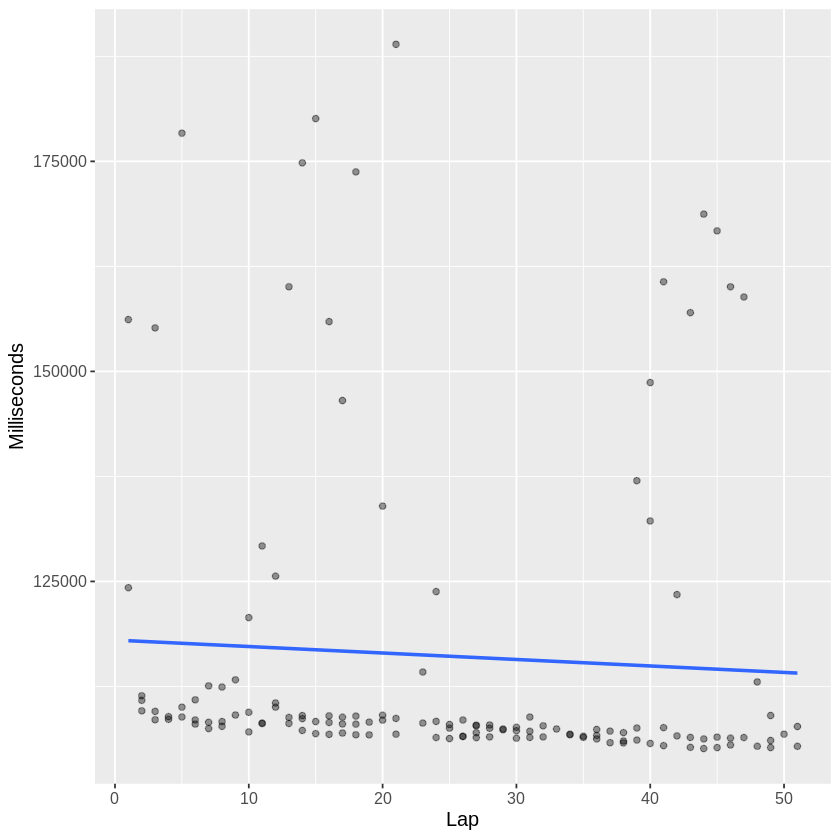

In [12]:
set.seed(2022)

#8. Azerbaijan

ls_azerbaijan <- str_laps %>%
                filter(raceId %in% azerbaijan_race_ID) 

ls_azerbaijan_clean <- ls_azerbaijan %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ls_azerbaijan_clean
ls_azerbaijan_clean_ID <- ls_azerbaijan_clean %>%
                        pull(raceId)


### SPLITTING DATA

ls_azerbaijan_races <- str_laps %>%
                    filter(raceId %in% ls_azerbaijan_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(ls_azerbaijan_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 8

initiate_rmse() 

### GETS PREDICTION

get_azerbaijan_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
975,69
1016,69


`geom_smooth()` using formula 'y ~ x'



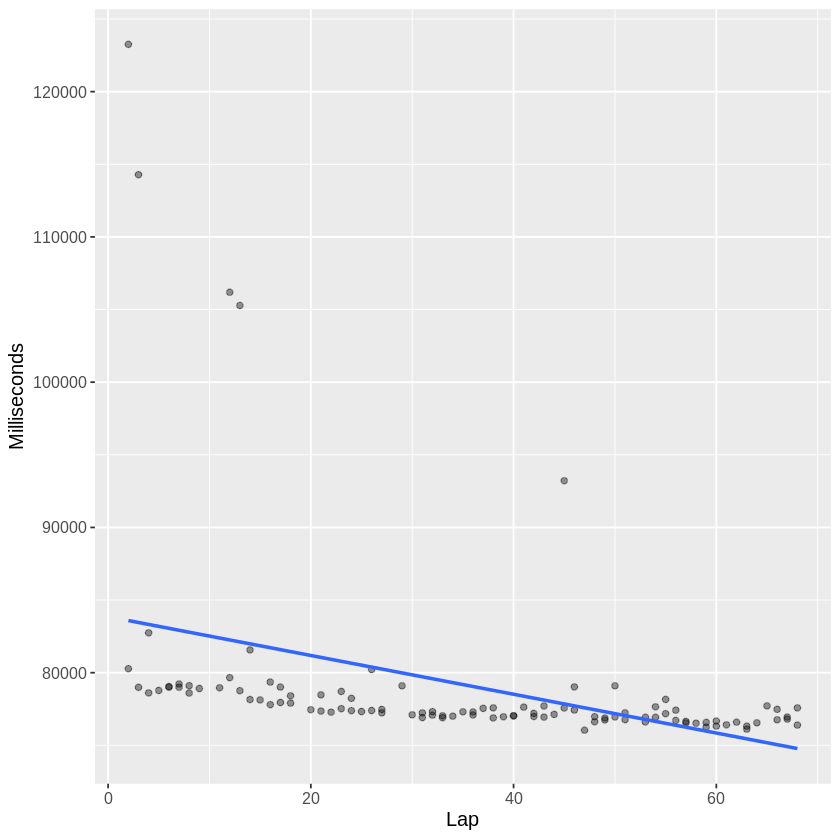

In [13]:
set.seed(2022)

#9. Canada

ls_canada <- str_laps %>%
                filter(raceId %in% canada_race_ID) 

ls_canada_clean <- ls_canada %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ls_canada_clean
ls_canada_clean_ID <- ls_canada_clean %>%
                        pull(raceId)


### SPLITTING DATA

ls_canada_races <- str_laps %>%
                    filter(raceId %in% ls_canada_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(ls_canada_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 9

initiate_rmse() 

### GETS PREDICTION

get_canada_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
998,52
1019,52
1034,52
1035,52
1061,52
978,50


`geom_smooth()` using formula 'y ~ x'



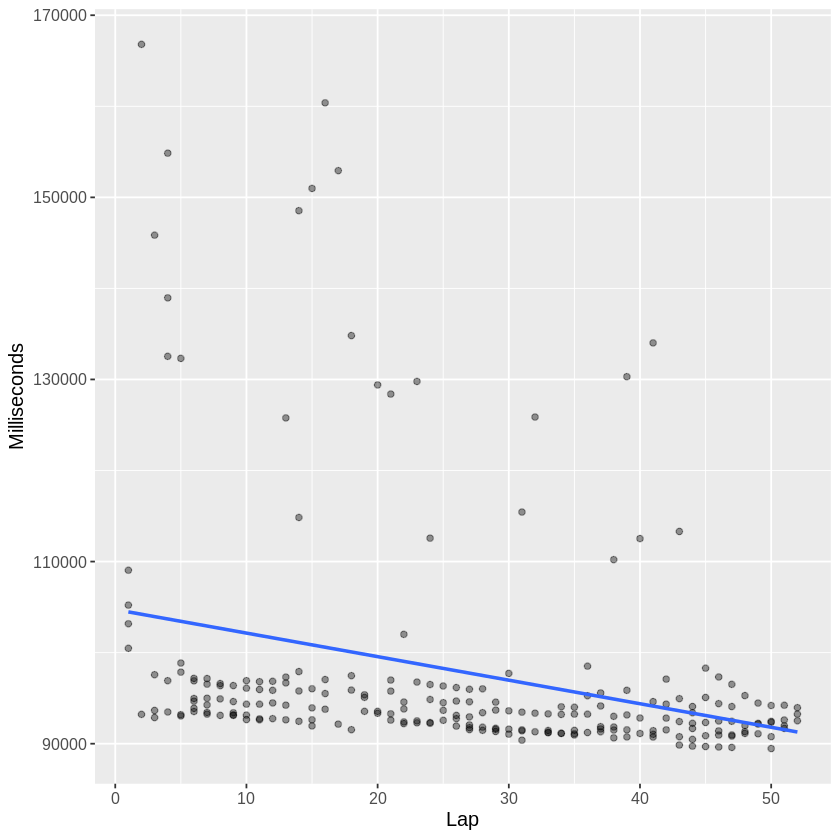

In [14]:
set.seed(2022)

#10. Great Britain

ls_uk <- str_laps %>%
                filter(raceId %in% uk_race_ID) 

ls_uk_clean <- ls_uk %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ls_uk_clean
ls_uk_clean_ID <- ls_uk_clean %>%
                        pull(raceId)


### SPLITTING DATA

ls_uk_races <- str_laps %>%
                    filter(raceId %in% ls_uk_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(ls_uk_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 10

initiate_rmse() 

### GETS PREDICTION

get_uk_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1032,71
977,70
1018,70
1058,70
1060,70
997,69
1031,20


`geom_smooth()` using formula 'y ~ x'



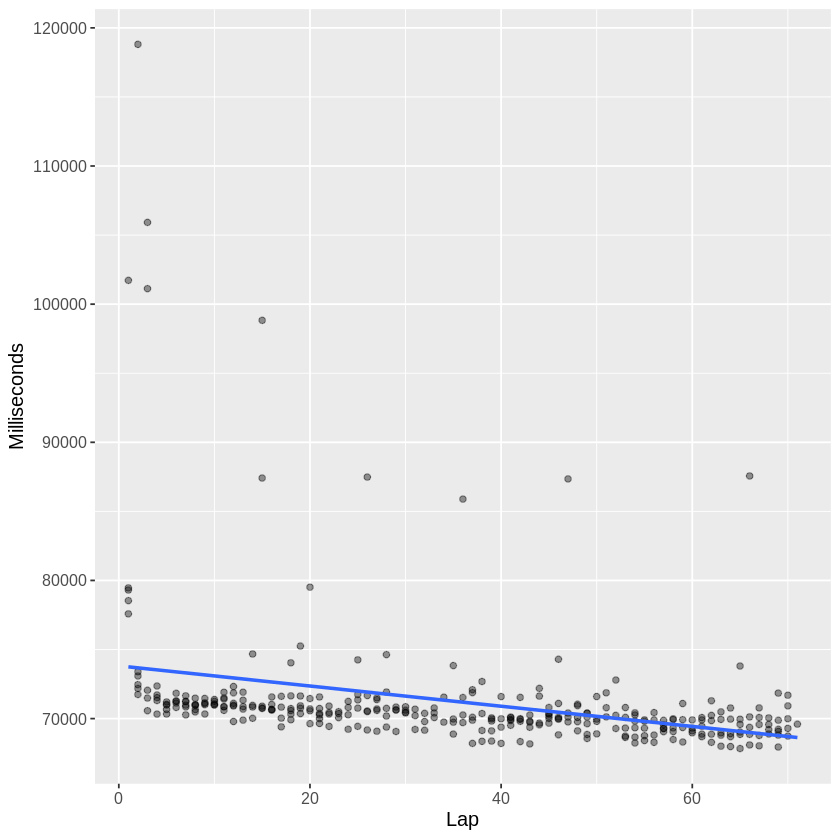

In [15]:
set.seed(2022)

#11. Austria

ls_austria <- str_laps %>%
                filter(raceId %in% austria_race_ID) 

ls_austria_clean <- ls_austria %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ls_austria_clean
ls_austria_clean_ID <- ls_austria_clean %>%
                        pull(raceId)


### SPLITTING DATA

ls_austria_races <- str_laps %>%
                    filter(raceId %in% ls_austria_clean_ID)

formulaone_split <- initial_split(ls_austria_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 11

initiate_rmse() 

### GETS PREDICTION

get_austria_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1059,53
1017,52
996,48


`geom_smooth()` using formula 'y ~ x'



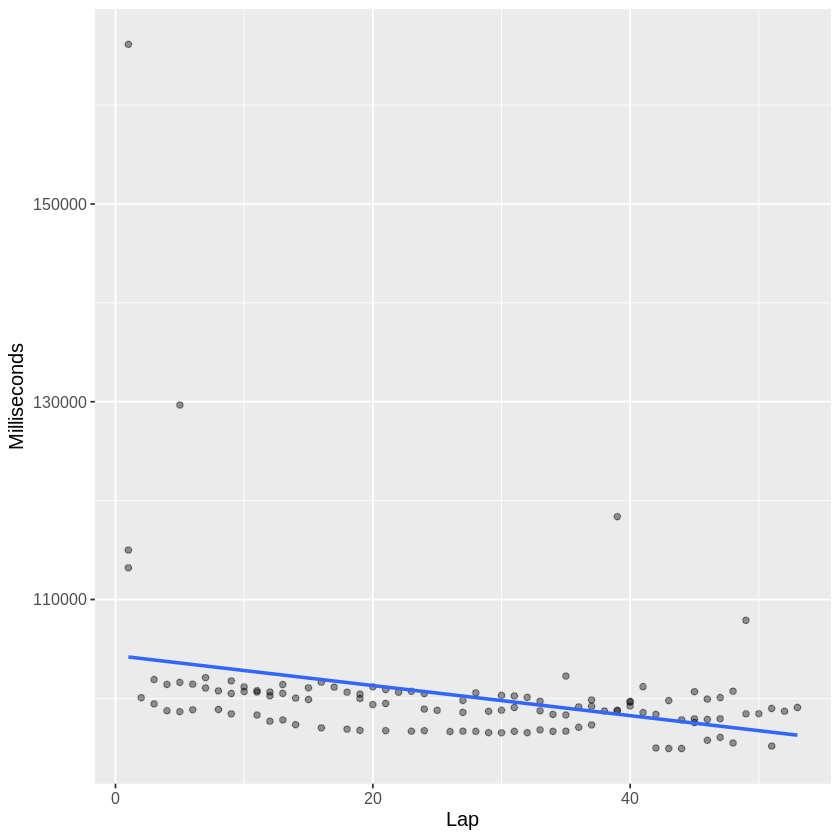

In [16]:
set.seed(2022)

#12. France

ls_france <- str_laps %>%
                filter(raceId %in% france_race_ID) 

ls_france_clean <- ls_france %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ls_france_clean
ls_france_clean_ID <- ls_france_clean %>%
                        pull(raceId)


### SPLITTING DATA

ls_france_races <- str_laps %>%
                    filter(raceId %in% ls_france_clean_ID)

formulaone_split <- initial_split(ls_france_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 12

initiate_rmse() 

### GETS PREDICTION

get_france_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1033,70
979,69
1000,68
1021,68


`geom_smooth()` using formula 'y ~ x'



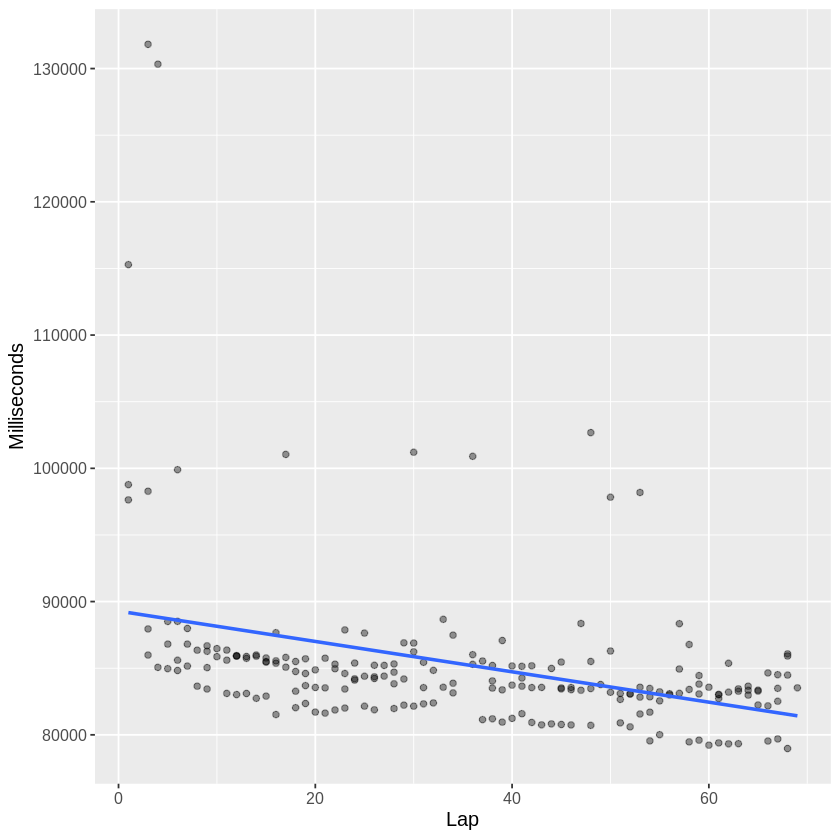

In [17]:
set.seed(2022)

#13. Hungary

ls_hungary <- str_laps %>%
                filter(raceId %in% hungary_race_ID) 

ls_hungary_clean <- ls_hungary %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))                     
ls_hungary_clean
ls_hungary_clean_ID <- ls_hungary_clean %>%
                        pull(raceId)


### SPLITTING DATA

ls_hungary_races <- str_laps %>%
                    filter(raceId %in% ls_hungary_clean_ID)

formulaone_split <- initial_split(ls_hungary_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 13

initiate_rmse() 

### GETS PREDICTION

get_hungary_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
980,44
1022,44
1037,44
1001,43
1063,1


`geom_smooth()` using formula 'y ~ x'



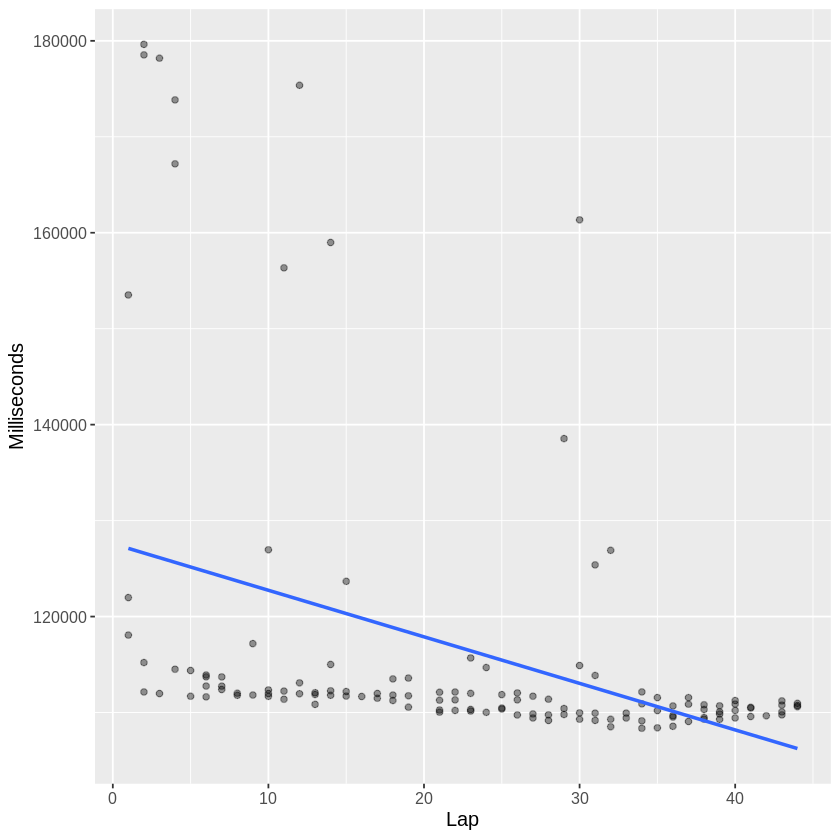

In [18]:
set.seed(2022)

#14. Belgium

ls_belgium <- str_laps %>%
                filter(raceId %in% belgium_race_ID) 

ls_belgium_clean <- ls_belgium %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ls_belgium_clean
ls_belgium_clean_ID <- ls_belgium_clean %>%
                        pull(raceId)


### SPLITTING DATA

ls_belgium_races <- str_laps %>%
                    filter(raceId %in% ls_belgium_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(ls_belgium_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression() 

round_n <- 14

initiate_rmse() 

### GETS PREDICTION

get_belgium_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1064,70


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



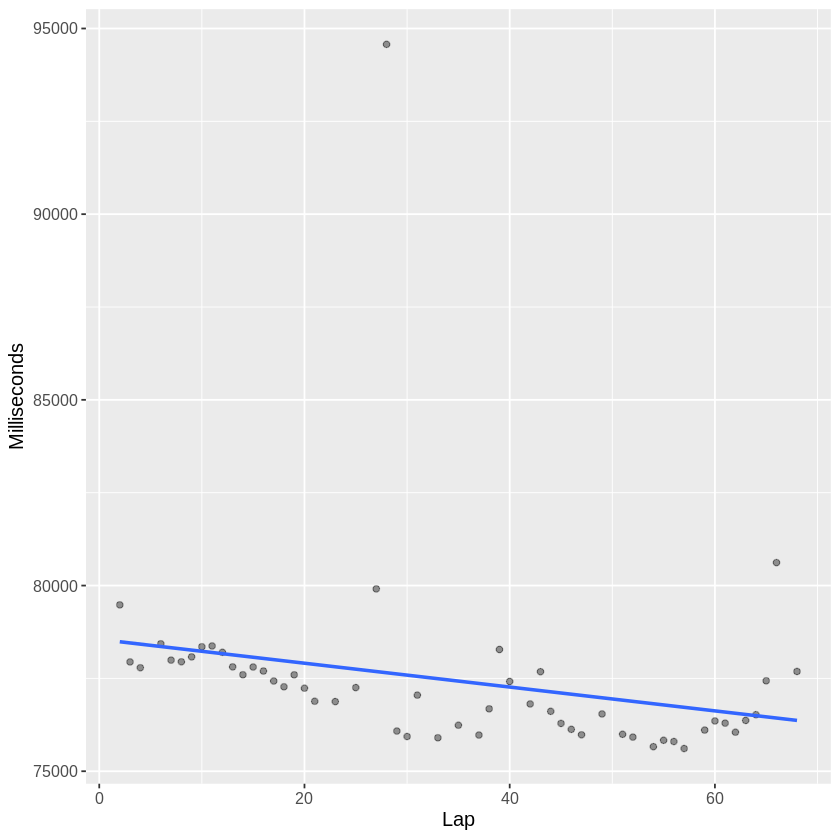

In [19]:
set.seed(2022)

#15. Netherlands

ls_netherlands <- str_laps %>%
                filter(raceId %in% netherlands_race_ID) 

ls_netherlands_clean <- ls_netherlands %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ls_netherlands_clean
ls_netherlands_clean_ID <- ls_netherlands_clean %>%
                        pull(raceId)


### SPLITTING DATA

ls_netherlands_races <- str_laps %>%
                    filter(raceId %in% ls_netherlands_clean_ID)

formulaone_split <- initial_split(ls_netherlands_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 15

initiate_rmse() 

### GETS PREDICTION

get_netherlands_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
981,53
1038,53
1065,53
1002,52
1023,52


`geom_smooth()` using formula 'y ~ x'



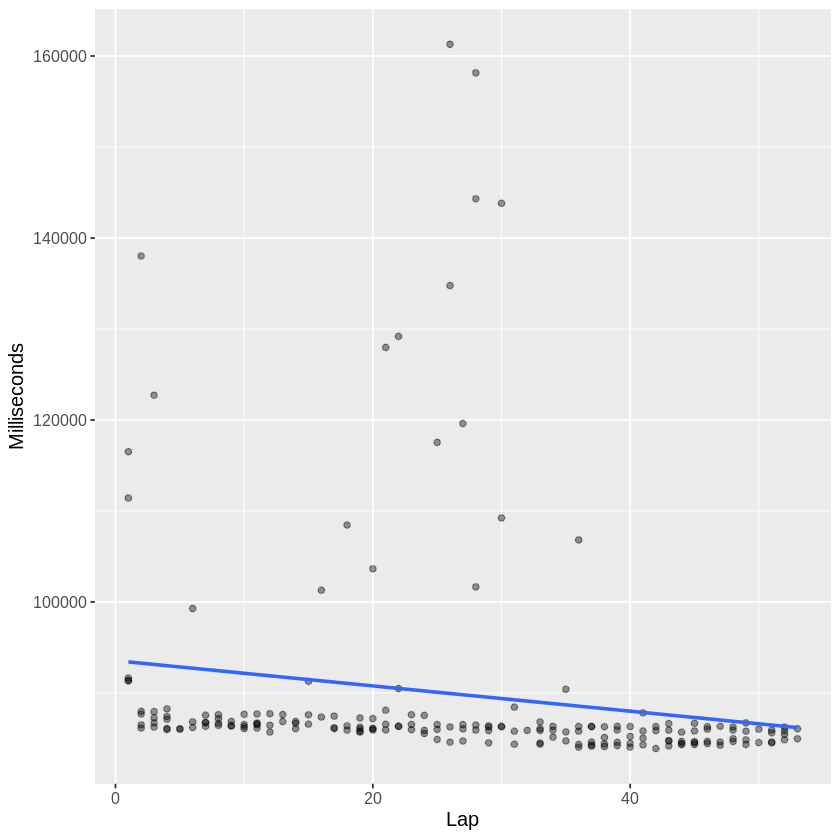

In [20]:
set.seed(2022)

#16. Italy, Monza

ls_monza <- str_laps %>%
                filter(raceId %in% monza_race_ID) 

ls_monza_clean <- ls_monza %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))
ls_monza_clean
ls_monza_clean_ID <- ls_monza_clean %>%
                        pull(raceId)


### SPLITTING DATA

ls_monza_races <- str_laps %>%
                    filter(raceId %in% ls_monza_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(ls_monza_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 16

initiate_rmse() 

### GETS PREDICTION

get_monza_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1024,61
1003,60
982,58


`geom_smooth()` using formula 'y ~ x'



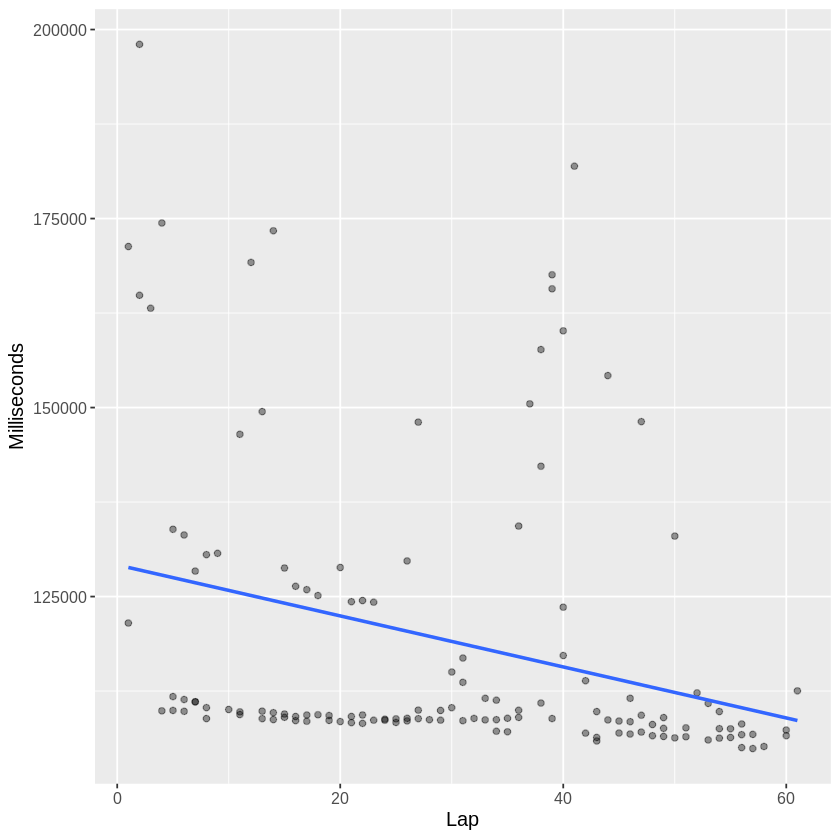

In [21]:
set.seed(2022)

#17. Singapore

ls_singapore <- str_laps %>%
                filter(raceId %in% singapore_race_ID) 

ls_singapore_clean <- ls_singapore %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ls_singapore_clean
ls_singapore_clean_ID <- ls_singapore_clean %>%
                        pull(raceId)


### SPLITTING DATA

ls_singapore_races <- str_laps %>%
                    filter(raceId %in% ls_singapore_clean_ID)

formulaone_split <- initial_split(ls_singapore_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression() 

round_n <- 17

initiate_rmse() 

### GETS PREDICTION

get_singapore_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1005,52
1026,51
984,45


`geom_smooth()` using formula 'y ~ x'



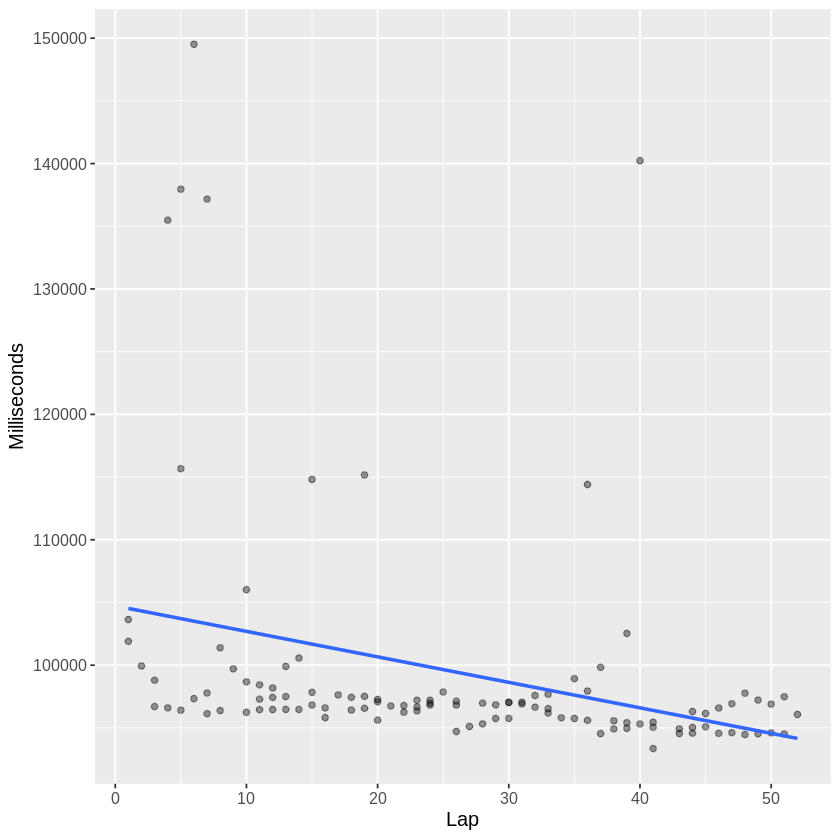

In [22]:
set.seed(2022)

#18. Japan

ls_japan <- str_laps %>%
                filter(raceId %in% japan_race_ID) 

ls_japan_clean <- ls_japan %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ls_japan_clean
ls_japan_clean_ID <- ls_japan_clean %>%
                        pull(raceId)


### SPLITTING DATA

ls_japan_races <- str_laps %>%
                    filter(raceId %in% ls_japan_clean_ID)

formulaone_split <- initial_split(ls_japan_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression() 

round_n <- 18

initiate_rmse() 

### GETS PREDICTION

get_japan_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
985,55
1028,55
1069,55
1006,54


`geom_smooth()` using formula 'y ~ x'



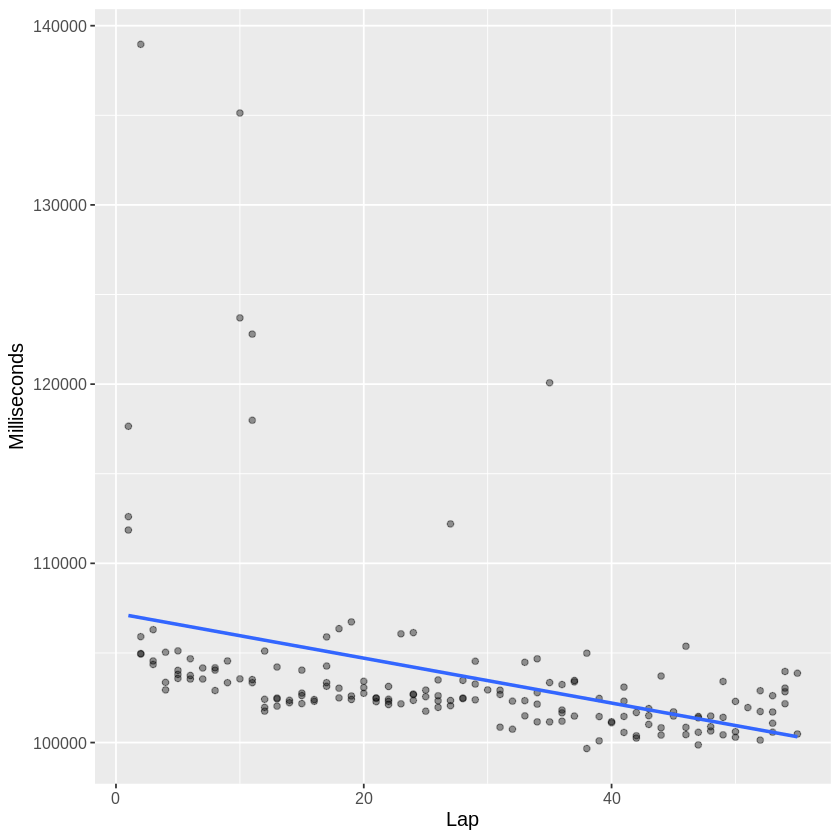

In [23]:
set.seed(2022)

#19. USA, Austin

ls_austin <- str_laps %>%
                filter(raceId %in% austin_race_ID) 

ls_austin_clean <- ls_austin %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ls_austin_clean
ls_austin_clean_ID <- ls_austin_clean %>%
                        pull(raceId)


### SPLITTING DATA

ls_austin_races <- str_laps %>%
                    filter(raceId %in% ls_austin_clean_ID)

formulaone_split <- initial_split(ls_austin_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 19

initiate_rmse() 

### GETS PREDICTION

get_austin_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
986,70
1027,70
1007,69
1070,69


`geom_smooth()` using formula 'y ~ x'



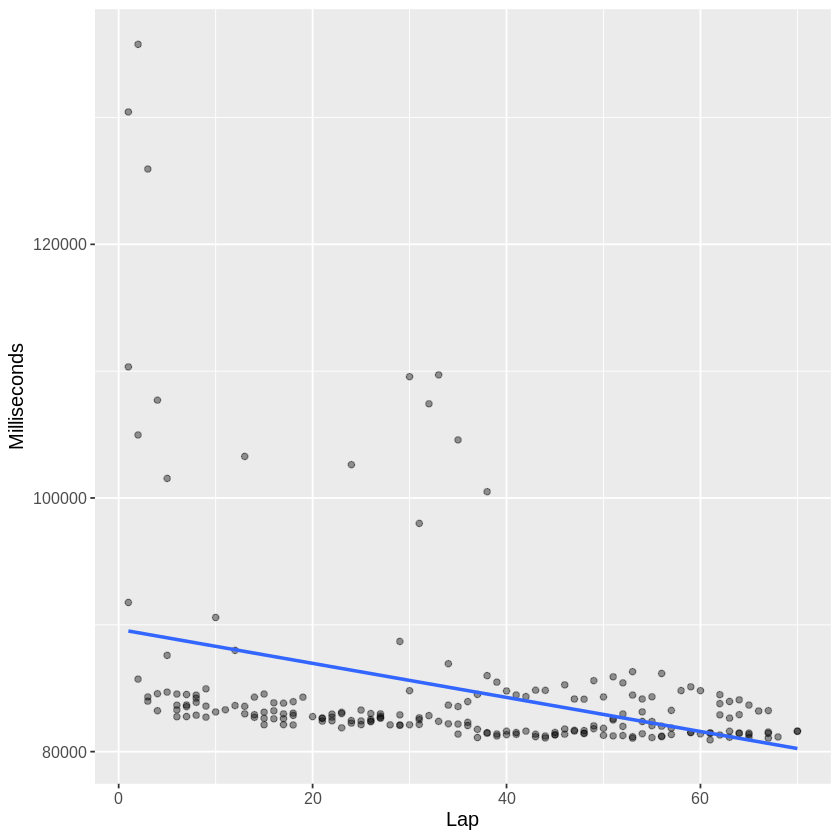

In [24]:
set.seed(2022)

#20. Mexico

ls_mexico <- str_laps %>%
                filter(raceId %in% mexico_race_ID) 

ls_mexico_clean <- ls_mexico %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ls_mexico_clean
ls_mexico_clean_ID <- ls_mexico_clean %>%
                        pull(raceId)


### SPLITTING DATA

ls_mexico_races <- str_laps %>%
                    filter(raceId %in% ls_mexico_clean_ID)

formulaone_split <- initial_split(ls_mexico_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 20

initiate_rmse() 

### GETS PREDICTION

get_mexico_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
987,69
1008,69
1029,65
1071,47


`geom_smooth()` using formula 'y ~ x'



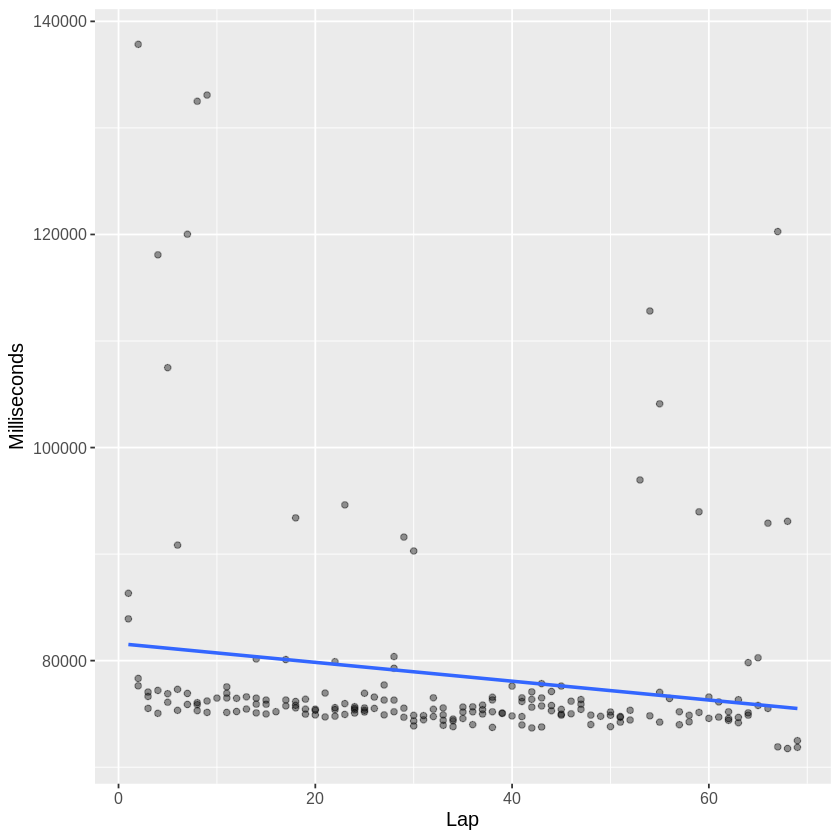

In [25]:
set.seed(2022)

#21. Brazil

ls_brazil <- str_laps %>%
                filter(raceId %in% brazil_race_ID) 

ls_brazil_clean <- ls_brazil %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ls_brazil_clean
ls_brazil_clean_ID <- ls_brazil_clean %>%
                        pull(raceId)


### SPLITTING DATA

ls_brazil_races <- str_laps %>%
                    filter(raceId %in% ls_brazil_clean_ID)

formulaone_split <- initial_split(ls_brazil_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 21

initiate_rmse() 

### GETS PREDICTION

get_brazil_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1047,55
988,54
1009,54
1030,45


`geom_smooth()` using formula 'y ~ x'



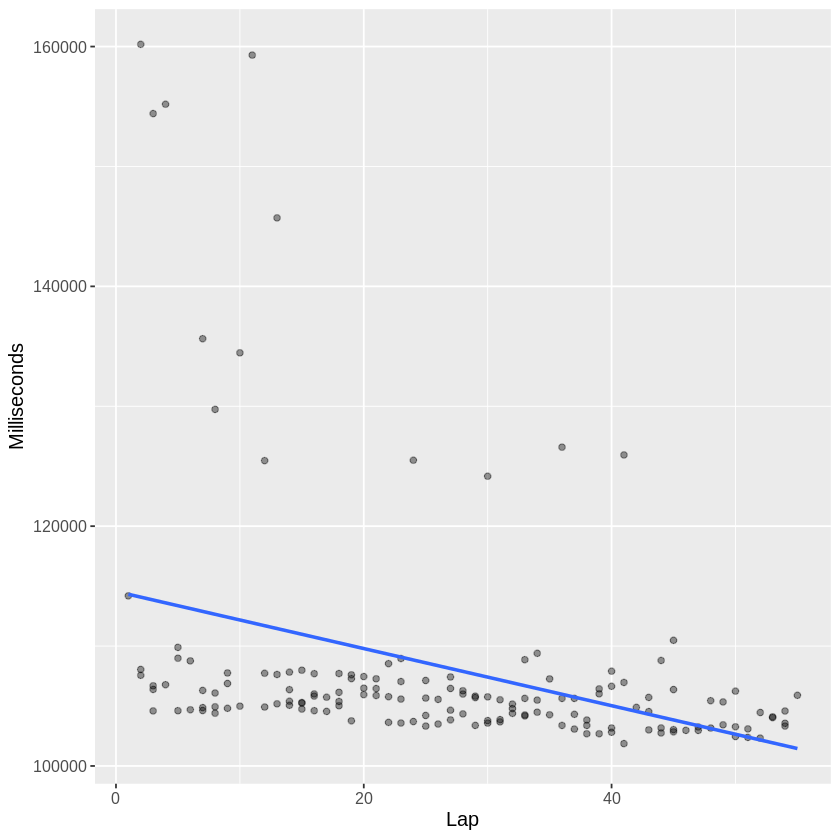

In [26]:
set.seed(2022)

#22. Abu Dhabi

ls_uae <- str_laps %>%
                filter(raceId %in% uae_race_ID) 

ls_uae_clean <- ls_uae %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ls_uae_clean
ls_uae_clean_ID <- ls_uae_clean %>%
                        pull(raceId)


### SPLITTING DATA

ls_uae_races <- str_laps %>%
                    filter(raceId %in% ls_uae_clean_ID)

formulaone_split <- initial_split(ls_uae_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 22

initiate_rmse() 

### GETS PREDICTION

get_uae_prediction()

## Collection

In [27]:
rmse_col
racetime_col

#write_csv(rmse_col, "ls_rmse.csv")

.metric,.estimator,.estimate,Round
<chr>,<chr>,<dbl>,<dbl>
rmse,standard,9873.476,1
rmse,standard,11508.964,2
rmse,standard,6219.282,3
rmse,standard,15347.692,4
rmse,standard,9253.227,5
rmse,standard,7062.414,6
rmse,standard,9659.983,7
rmse,standard,19213.847,8
rmse,standard,4637.469,9


race_time_milliseconds,race_time_mins,race_time_hrs,Round
<dbl>,<dbl>,<dbl>,<dbl>
5698626,94.97710,1.582952,1
5606249,93.43749,1.557292,2
5345226,89.08710,1.484785,3
5654184,94.23641,1.570607,4
5744969,95.74948,1.595825,5
5771475,96.19124,1.603187,6
6248531,104.14218,1.735703,7
5916877,98.61461,1.643577,8
5538112,92.30186,1.538364,9
